<h1><center> 
     Example of hvsrprocpy Usage
</center></h1>
<center>
    By: Francisco Javier G. Ornelas (jornela1@ucla.edu)<br>Originally created: Apr. 28, 2024<br>
</center>

In [16]:
# pip install -i https://test.pypi.org/simple/ hvsrprocpy

In [3]:
from hvsrprocpy import hvsrproc

In [18]:
#Print statement to see what are the functions and inputs within hvsrProc
help(hvsrproc)

Pre-processing noise data is DONE!


<Figure size 800x600 with 0 Axes>

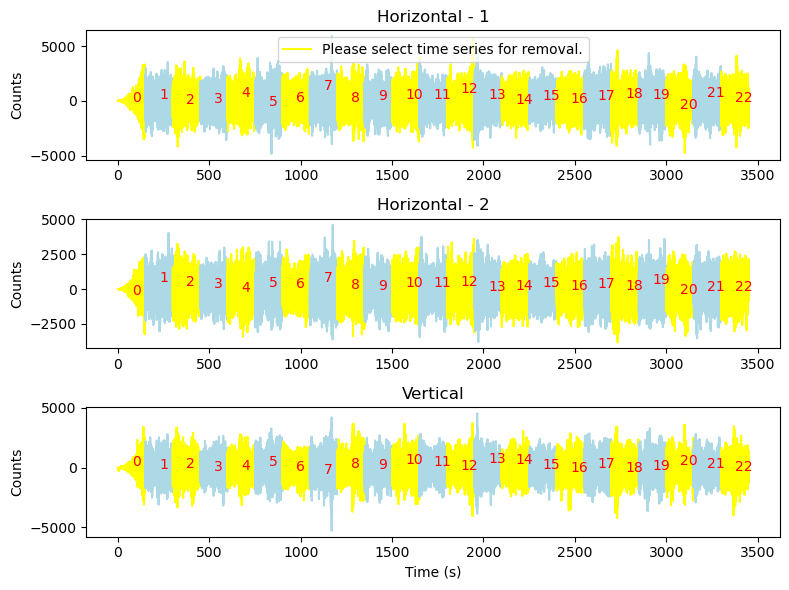

Enter the index of the window to remove (Press q to quit): q
Time-domain selection is DONE!
Preparing for frequency-domain, please wait...


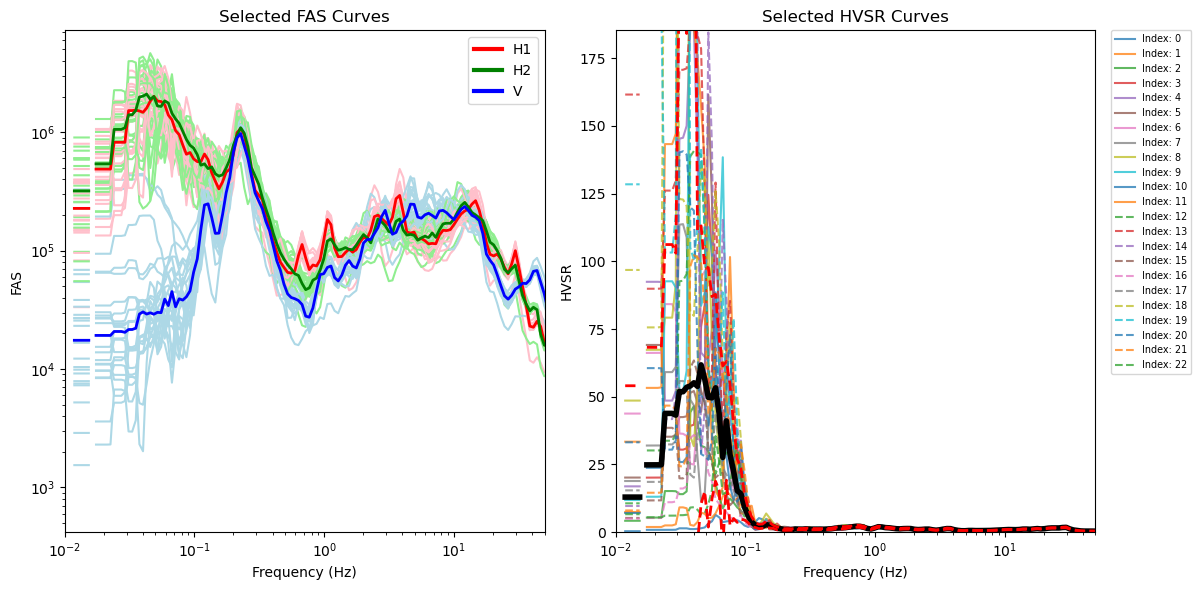

Enter the index of the curve to remove (press 'q' to quit): q
Frequency-domain selection is DONE!
Everything is DONE, check out the results in the output folder!
CPU times: total: 7.77 s
Wall time: 22.8 s


In [20]:
%%time

#Specify directory where .txt or .mseed files are stored
direc = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\VSPDB Data\CA Vertical Array Data\HVSRdata\2\2.250.2\Text_File_data\Raw_mseed_PEG_HH'

#Specify filenames of .mseed or .txt files
h1 = 'NX.USC6..HHE.D.2022.250'
h2 = 'NX.USC6..HHN.D.2022.250'
v = 'NX.USC6..HHZ.D.2022.250'

#specify where you want output to be stored
output_dir = direc

#initialize the class object containing all the functions
hvsr = hvsrproc.HvsrProc(h1 = h1, h2 = h2, v = v, directory=direc, output_dir = output_dir)

#Use the main function hv_proc which processes time series and hvsr
win_result, fd_select = \
hvsr.hv_proc(time_cut=150, file_type = 1, win_width=300, trim_flag=False, plot_ts=True, plot_hvsr=True, output_polar_curves=False)

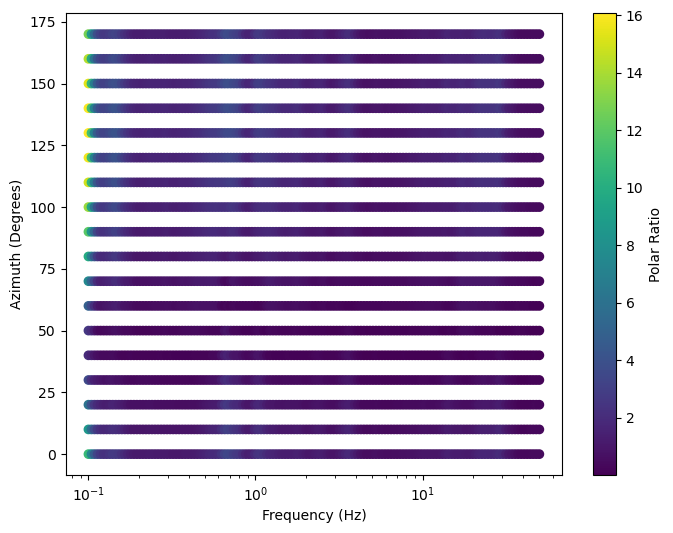

In [6]:
#Plot Polar Curve from output of hvsrProc
import pymysql, json
import os
import pandas as pd

#specify directory where polar curve data is stored
POLAR = pd.read_csv(os.path.join(output_dir,'Test_hvsr_polar.csv'))

#specify where json file of frequencies is stored
standard_freqs = json.load(open(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\Site Response Modelling Inv\GMDB OSAKA INV\mean_curves/HVSR_VSPDB_standard_frequencies.json'))

#specify degree increment
deg_increment = 10

#Specify azimuth
AZIMUTHS = list(range(0, 180, deg_increment))

#Process polar curve data
processed_pol_data = hvsr.process_polar_curve(polar_data = POLAR, azimuths = AZIMUTHS, standard_freqs = standard_freqs)

#Plot the polar curve
fig = hvsr.plot_polar_ratio(processed_pol_data)

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

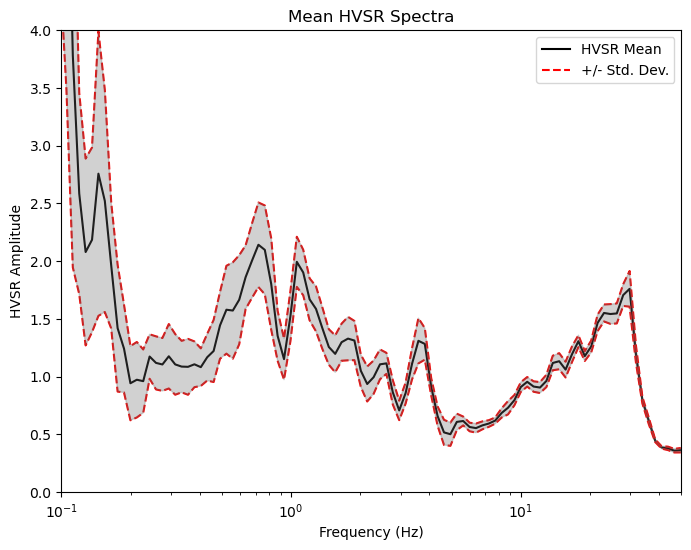

In [21]:
#Specify directory where mean hvsr curve is stored
Mean_df = os.path.join(direc,'Test_hvsr_mean.csv')

#Specify directory where metadata is stored
metadata_csv_filepath = os.path.join(direc,'Test_metadata.csv')

#Plot the mean curve
fig = hvsr.plot_mean_hvsr(csv_file_path=Mean_df, metadata_csv_path=metadata_csv_filepath, xlim_m = 65, ylim_m = 2,
                              xlim=(0.1, 50), ylim=(0,4), robust_est=False, metadata_flag=False)

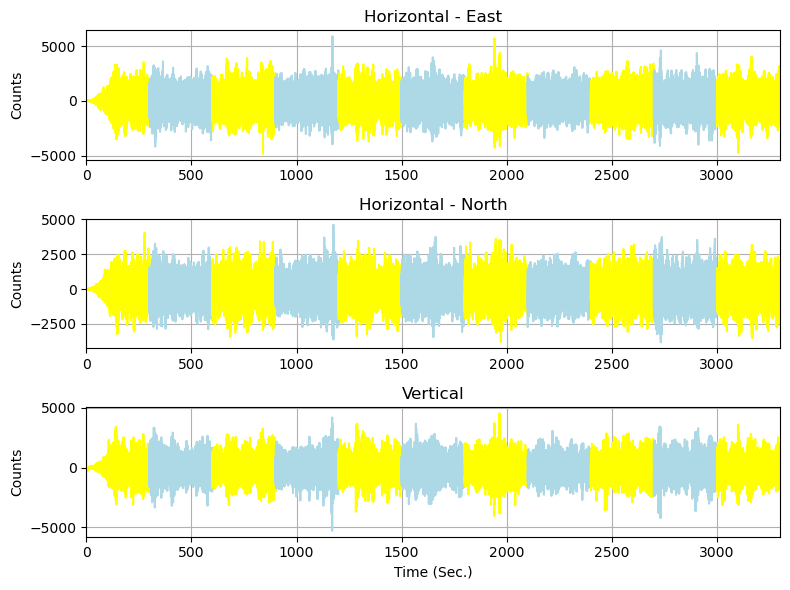

In [12]:
#Plot selected and unselected time series from output of hvsrProc

#Specify directory where the time series is stored
ts_df = os.path.join(direc,'Test_ts_sel.csv')

#Plot the time series
fig = hvsr.plot_selected_time_series(csv_file_path = ts_df)

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

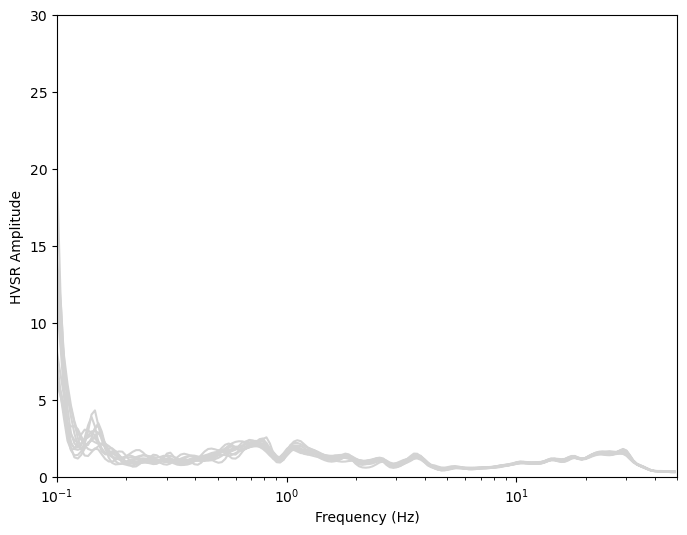

In [13]:
#Plot selected time series from output of hvsrProc

#Specify where the directory for the selected hvsr curves are located
sel_curve_dir = os.path.join(direc,'Test_hvsr_sel.csv')

#Plot the selected hvsr curves
fig = hvsr.plot_selected_hvsr(sel_curve_dir,xlim=(0.1, 50), ylim=(0, 30))

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

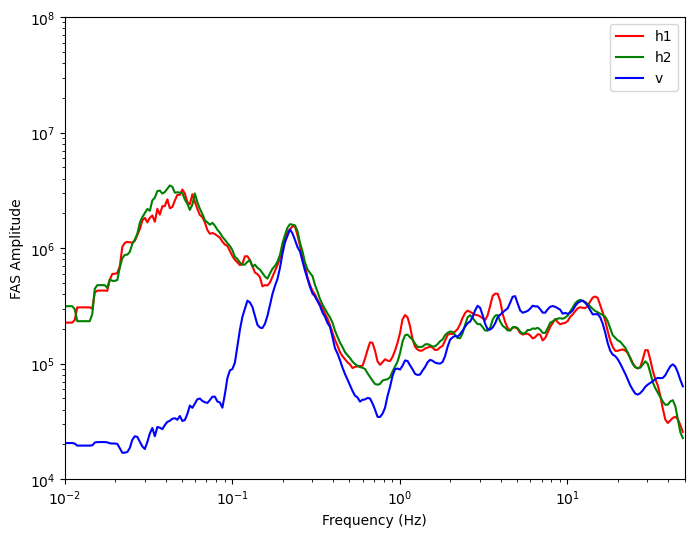

In [15]:
csv_path = os.path.join(direc,'Test_FAS_mean.csv')

fig = hvsr.plot_fas(csv_path, xlim=(0.01, 50), ylim=(10e3, 10e7))

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)